In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('FuelConsumption.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
dataset.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]>

In [ ]:
X = dataset[['MAKE', 'MODEL', 'FUELTYPE', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = dataset['CO2EMISSIONS']

In [ ]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False), ['MAKE', 'MODEL', 'FUELTYPE'])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(853, 709)

In [ ]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = multi_regressor.predict(X_test)

In [ ]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-9.21443250e+00  3.95818794e+00 -7.12438707e-02  5.17018956e+00
 -6.89435086e+00  2.00057815e-01  4.48944978e+00  4.24258649e+00
  2.84758663e+00  4.18039062e+00 -9.66917987e+00  6.17985262e+00
  1.42947567e+01 -3.58615777e+00 -3.50622184e+00 -9.34896479e+00
 -4.34497438e-01  6.42332163e+00 -1.73198396e+00  9.88441923e+00
  9.25335800e+00 -5.70180270e+00  2.71038785e+00  9.09822173e+00
 -7.81659798e+00 -1.15466544e+00 -1.51379551e+01 -3.74970723e+00
  1.07390920e+00 -5.75865239e+00  1.19981463e+01  6.67347300e+00
 -8.22889649e+00 -1.25052391e+01  5.87217807e+00 -1.75617533e+00
 -1.79345175e+00 -3.47234432e+00  2.98204751e+00 -1.15966217e+00
  2.87396548e+00  7.21250783e+00  3.83954458e+00  2.36986954e+00
  9.23938209e-01 -9.76779529e+00  2.39129806e+00 -6.30251220e+00
 -4.51340235e-01  3.82196600e+00 -8.22383135e+00 -2.84217094e-14
 -3.45987391e+00  1.80562092e+00  5.66460429e+00  2.70965749e+00
 -5.41283009e+00 -9.35640395e+00 -6.51376566e+00 -9.39436510e+00
 -9.39436510e+00 -8.16541

In [ ]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9714832481283195


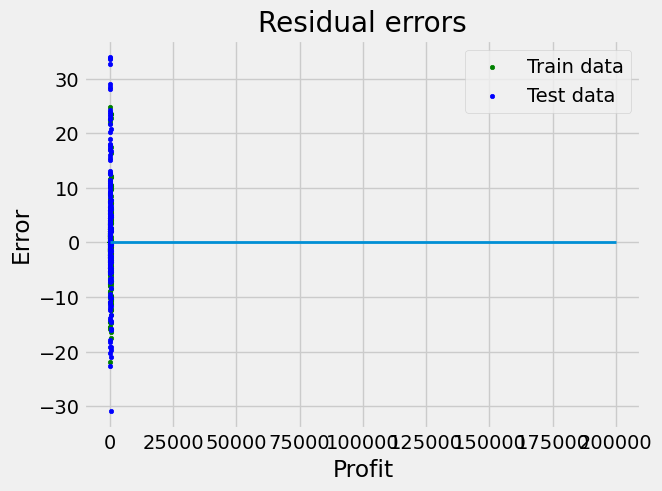

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.777892210817217
MSE: 120.383053936859
RMSE: 10.971921159799637


# 2 APPLYING MULTIPLE REGRESSION

In [ ]:
X = dataset[['MAKE', 'MODEL', 'FUELTYPE', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = dataset['CO2EMISSIONS']

In [ ]:
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), ['MAKE', 'MODEL', 'FUELTYPE'])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 0)
X_train.shape

(640, 709)

In [ ]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = multi_regressor.predict(X_test)

In [ ]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-7.51359154e+00  1.54883469e+00  8.63826651e-01  1.44513704e+00
 -5.61603907e+00 -5.00448660e-01  3.38582688e+00  3.78123998e+00
  4.86131018e+00  4.62052290e+00 -6.23667464e+00  5.34844251e+00
  1.22253840e+01 -2.72444993e+00 -2.05253205e+00 -8.18913713e+00
 -7.18737324e-01  6.21633266e+00  1.92675461e-02  6.55895339e+00
  7.21602280e+00 -4.91402522e+00  2.22967405e+00  7.54482842e+00
 -4.75570681e+00 -2.09053664e+00 -1.21744879e+01 -2.40795872e+00
  2.61306576e+00 -4.65045403e+00  1.15525655e+01  2.00095324e+00
 -5.91312502e+00 -1.00772976e+01 -1.24344979e-13 -7.85232778e-01
 -2.58285930e+00 -2.32131792e+00  2.19242416e+00 -2.98481743e+00
  5.12587756e-01  6.53936732e+00  4.02672108e+00  2.08670900e+00
  1.93982215e+00 -9.24850983e+00  1.31929377e+00 -7.46257118e+00
 -1.13336455e+00  4.23095042e+00 -9.18890034e+00 -8.08242362e-14
 -5.00991286e+00  1.42108547e-14  5.68360874e+00  1.61086491e+01
 -8.49910269e+00 -8.88178420e-16 -5.06092140e+00  4.44089210e-15
 -7.89331742e+00 -6.46883

In [ ]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9764611096441649


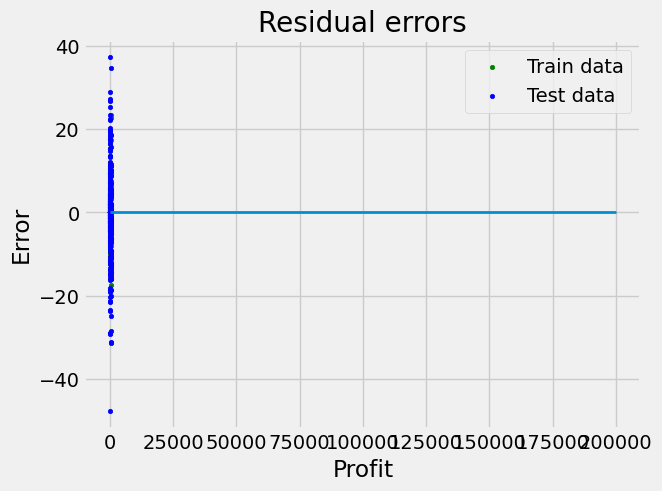

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.908936126884209
MSE: 96.5602220828028
RMSE: 9.826506097428668


# **3** **POLYNOMIAL REGRESSION**





In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [ ]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [ ]:
print(poly_regressor.coef_)
print(poly_regressor.intercept_)

[ 5.02710096e-11  2.24789227e-02  2.73994720e-02 ... -1.78058566e+00
  6.21332829e-01 -2.74957217e-02]
31.73471778450343


In [ ]:
print('Variance score:', poly_regressor.score(X_poly_test, y_test))

Variance score: 0.9970552054031023


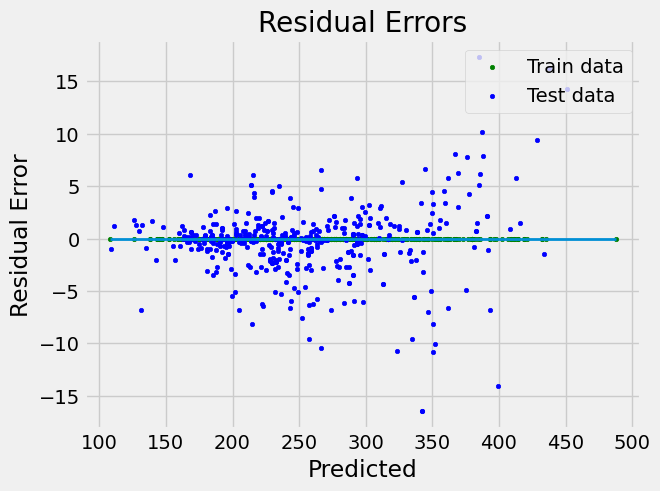

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(poly_regressor.predict(X_poly_train), poly_regressor.predict(X_poly_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(poly_regressor.predict(X_poly_test), poly_regressor.predict(X_poly_test) - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=min(y), xmax=max(y), linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual Errors")
plt.xlabel("Predicted")
plt.ylabel("Residual Error")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

MAE: 2.157120344076708
MSE: 12.080009548716378
RMSE: 3.47563081306349


**4 POLYNOMIAL REGRESSION ON "DIABETES DATASET"**





Coefficients: [ 1.02737951e-08  1.08828416e+02 -3.11898491e+02  4.21980794e+02
  3.91317715e+02 -1.69978817e+04  1.48192215e+04  6.05907491e+03
  4.43719629e+01  6.24332056e+03  9.85710597e+00  2.39028514e+03
  1.52465762e+03 -1.29048951e+03  6.61958511e+02 -9.38779898e+02
 -7.24306985e+03  5.90750460e+03  9.79750036e+03  1.22545646e+03
  8.57928127e+02 -1.88339350e+00  3.46891714e+02  1.25430373e+03
  1.60832972e+03  1.65480922e+03 -3.52932759e+03 -7.60218049e+03
  2.13145537e+03  6.88174670e+02  8.00898355e+02  3.34793540e+03
 -6.15585745e+03  7.29715549e+03 -2.11435053e+02 -3.58431763e+03
  3.69561236e+03  4.74291338e+02 -2.56573693e+02  1.99317477e+04
 -1.46380406e+04 -8.28673720e+03 -1.39611298e+03 -7.89399258e+03
 -3.30189040e+03  9.33891518e+04 -1.28756527e+05 -6.15540508e+04
 -2.52383912e+04 -4.02934360e+04 -7.83769371e+03  4.56824718e+04
  3.44539044e+04  6.46546512e+03  2.36593510e+04  4.13953522e+03
  1.10367291e+04  1.61730992e+04  1.32783369e+04  7.79737855e+03
  1.1979688

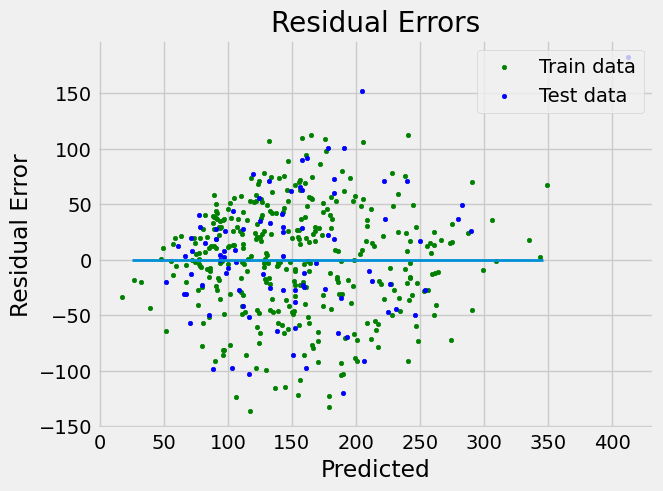

MAE: 43.581693254652215
MSE: 3096.028307344255
RMSE: 55.641965344012206


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

y_poly = poly_regressor.predict(X_poly_test)

print("Coefficients:", poly_regressor.coef_)
print("Intercept:", poly_regressor.intercept_)

print("Variance score:", poly_regressor.score(X_poly_test, y_test))

plt.style.use("fivethirtyeight")
plt.scatter(
    poly_regressor.predict(X_poly_train),
    poly_regressor.predict(X_poly_train) - y_train,
    color="green",
    s=10,
    label="Train data",
)
plt.scatter(
    poly_regressor.predict(X_poly_test),
    poly_regressor.predict(X_poly_test) - y_test,
    color="blue",
    s=10,
    label="Test data",
)
plt.hlines(y=0, xmin=min(y), xmax=max(y), linewidth=2)
plt.legend(loc="upper right")
plt.title("Residual Errors")
plt.xlabel("Predicted")
plt.ylabel("Residual Error")
plt.show()

print("MAE:", metrics.mean_absolute_error(y_test, y_poly))
print("MSE:", metrics.mean_squared_error(y_test, y_poly))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_poly)))
